In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from scipy.special import gamma, factorial
import warnings
warnings.filterwarnings("ignore")
import itertools

Considere el archivo ```datosCaso3punto1.txt``` . Este archivo contiene 100.000 observaciones de una medición que se modela como una variable aleatoria continua. Se conoce que la distribución es de una variable **Gamma**. Recuerde que la distribución de una variable Gamma está dada por

$$f(x; \alpha, \beta) = \frac{\beta^\alpha x^{\alpha-1}e^{-\beta x}}{\Gamma(\alpha)}$$
con $x$, $\alpha$, $\beta > 0$ 

en donde 

$$\Gamma(z) = \int_{0}^{\infty}t^{z-1}e^{-t}dt$$

Para el caso particular de **todos los enteros positivos** se tiene que 
$$\Gamma(\alpha) = (\alpha-1)!$$

# a) Histograma

Cree varios intervalos de igual tamaño donde la variable aleatoria puede tomar valores, y calcule la frecuencia relativa para cada uno de estos intervalos. Grafique la frecuencia relativa versus cada intervalo de los valores que toma la variable aleatoria. Esta gráfica se denomina histograma. No puede utilizar una función predefinida para calcular el histograma.

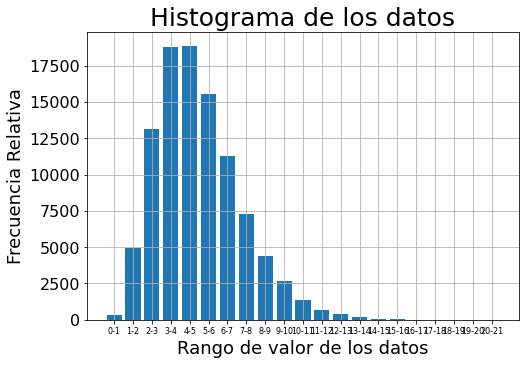

In [ ]:
# Se importan los datos del .txt
filename = 'datosCaso3punto1.txt'
data = np.loadtxt(filename, delimiter='\n', skiprows=0, dtype=float)

# Se crea una lista para cada diferente intervalo.
grupo1 = []
grupo2 = []
grupo3 = []
grupo4 = []
grupo5 = []
grupo6 = []
grupo7 = []
grupo8 = []
grupo9 = []
grupo10 = []
grupo11 = []
grupo12 = []
grupo13 = []
grupo14 = []
grupo15 = []
grupo16 = []
grupo17 = []
grupo18 = []
grupo19 = []
grupo20 = []
grupo21 = []

# Se guarda un dato específico en una lista determinada, dependiendo de si el dato está dentro de cierto intervalo de valores.
for dato in data:
    if dato >= 0 and dato <= 1:
        grupo1.append(dato)
    elif dato > 1 and dato <= 2:
        grupo2.append(dato)
    elif dato > 2 and dato <= 3:
        grupo3.append(dato)
    elif dato > 3 and dato <= 4:
        grupo4.append(dato)
    elif dato > 4 and dato <= 5:
        grupo5.append(dato)
    elif dato > 5 and dato <= 6:
        grupo6.append(dato)
    elif dato > 6 and dato <= 7:
        grupo7.append(dato)
    elif dato > 7 and dato <= 8:
        grupo8.append(dato)
    elif dato > 8 and dato <= 9:
        grupo9.append(dato)
    elif dato > 9 and dato <= 10:
        grupo10.append(dato)
    elif dato > 10 and dato <= 11:
        grupo11.append(dato)
    elif dato > 11 and dato <= 12:
        grupo12.append(dato)
    elif dato > 12 and dato <= 13:
        grupo13.append(dato)
    elif dato > 13 and dato <= 14:
        grupo14.append(dato)
    elif dato > 14 and dato <= 15:
        grupo15.append(dato)
    elif dato > 15 and dato <= 16:
        grupo16.append(dato)
    elif dato > 16 and dato <= 17:
        grupo17.append(dato)
    elif dato > 17 and dato <= 18:
        grupo18.append(dato)
    elif dato > 18 and dato <= 19:
        grupo19.append(dato)
    elif dato > 19 and dato <= 20:
        grupo20.append(dato)
    elif dato > 20 and dato <= 21:
        grupo21.append(dato)

# Graficar
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
grupos = ['0-1', '1-2', '2-3', '3-4', '4-5', '5-6', '6-7', '7-8', '8-9', '9-10','10-11', '11-12', '12-13', '13-14', '14-15', '15-16', '16-17', '17-18', '18-19', '19-20', '20-21']
frecuencia = [len(grupo1), len(grupo2), len(grupo3), len(grupo4), len(grupo5), len(grupo6), len(grupo7), len(grupo8), len(grupo9), len(grupo10), len(grupo11), len(grupo12), len(grupo13), len(grupo14), len(grupo15), len(grupo16), len(grupo17), len(grupo18), len(grupo19), len(grupo20), len(grupo21)]
ax.bar(grupos,frecuencia)
plt.grid()
plt.title('Histograma de los datos', fontsize=25)
ax.set_xlabel('Rango de valor de los datos', fontsize = 18)
ax.set_ylabel('Frecuencia Relativa', fontsize = 18)
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 16)
plt.show()

# b) Estimación de la CDF

A partir del histograma, encuentre una forma sencilla de estimar la CDF de la variable aleatoria, y grafique el resultado. Tenga en cuenta que la CDF es una distribución acumulada. Justifique su respuesta. No puede utilizar funciones predefinidas para hacer esta estimación.

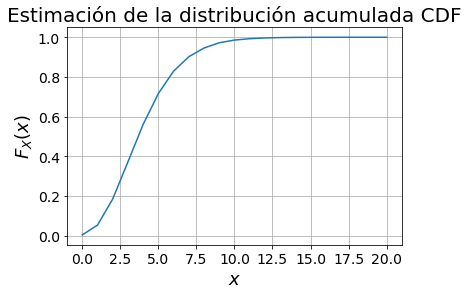

In [ ]:
# Se genera un vector en el que se irá guardando el valor de la distribución acumulada
acum = np.zeros((len(frecuencia), 1))

# Se genera un vector que sirve como el eje X para la distribución acumulada.
# Este vector cubre el rango de los datos.
ejex = np.linspace(0,20,len(frecuencia))

# Llenamos el vector de la CDF sumando el valor de la frecuencia anterior a la 
# frecuencia actual.
for i in range(len(frecuencia)):
    if i == 0:
        acum[i] = frecuencia[i]
    else:
        acum[i] = frecuencia[i] + acum[i-1]

# Normalizamos los datos
acum = acum/len(data)

# Graficar
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(ejex, acum)
plt.grid()
plt.title('Estimación de la distribución acumulada CDF', fontsize=20)
ax.set_xlabel(r'$x$', fontsize = 18)
ax.set_ylabel(r'$F_X(x)$', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# c) Estimación de la PDF

Utilizando el histograma en el punto **a)**, encuentre una forma sencilla de estimar la PDF de esa variable aleatoria, y grafique el resultado. Tenga en cuenta que la PDF es una densidad de probabilidad, es decir, probabilidad por unidad de la variable aleatoria. No puede utilizar funciones predefinidas para hacer esta estimación.

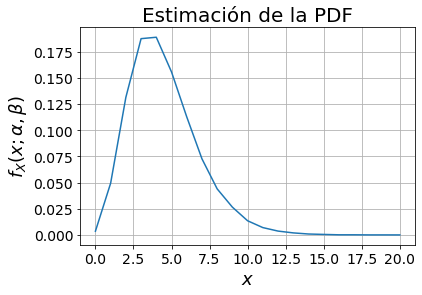

In [ ]:
# Se genera un vector en el que se irá guardando el valor de la PDF
pdf = np.zeros((len(frecuencia), 1))

# Se genera un vector que sirve como el eje X para la PDF.
# Este vector cubre el rango de los datos.
ejex = np.linspace(0,20,len(frecuencia))

# Llenamos el vector de PDF sabiendo que en cada componente debe estar la
# frecuencia de un intervalo, dividido por la cantidad de datos.
for i in range(len(pdf)):
    pdf[i] = frecuencia[i]/len(data)

# Graficar
fig = plt.figure()
ax = fig.add_subplot()
plt.plot(ejex, pdf)
plt.grid()
plt.title('Estimación de la PDF', fontsize=20)
ax.set_xlabel(r'$x$', fontsize = 18)
ax.set_ylabel(r'$f_X(x;\alpha,\beta)$', fontsize = 18)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

# d) Determinación de los parámetros que puede tener la variable aleatoria y los parámetros de la PDF real.

Basado en la estimación de la PDF, determine los parámetros que puede tener la variable aleatoria y los
parámetros de la PDF real. Para hacer esto, traslape la gráfica de la PDF estimada y la PDF que usted
considera es la real. Tenga en cuenta que la PDF de una variable Gamma se define por dos parámetros: forma (shape) $\alpha$ y escala $\beta$. No puede utilizar una función predefinida para generar esta PDF real.

***Ayuda: Por definición, se sabe que $P(a \leq z \leq b) = \int_{a}^{b}f_Z(z)dz$. Si asumimos que $\Delta = b-a$ es pequeño, tendríamos que $P(a \leq z \leq b) \approx f_Z(a)\Delta$, o en otras palabras, $f_Z(a) \approx P(a \leq z \leq b)/\Delta$. Utilice esta aproximación para resolver este punto.***

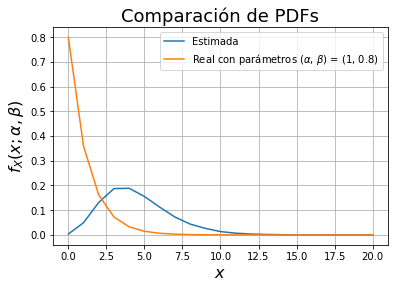

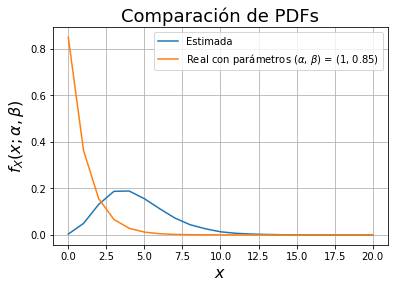

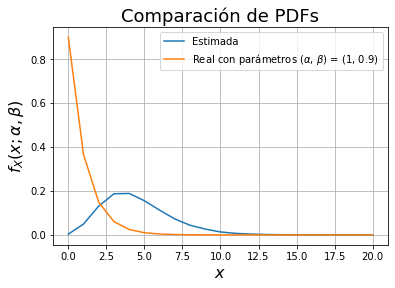

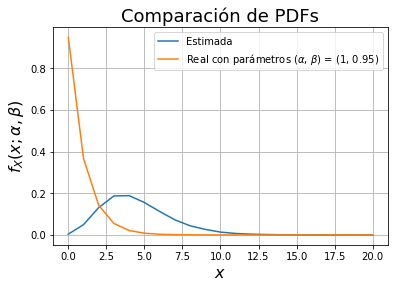

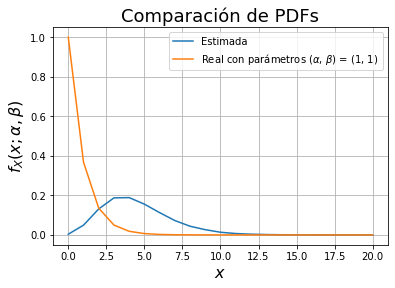

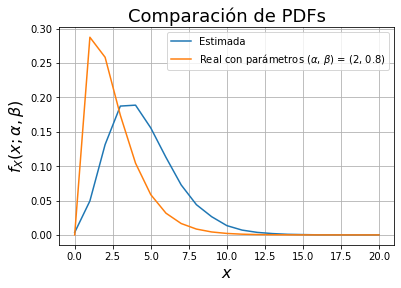

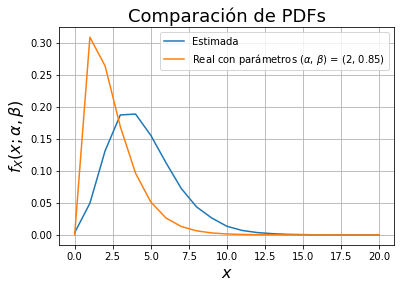

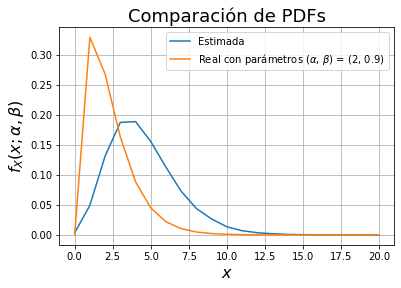

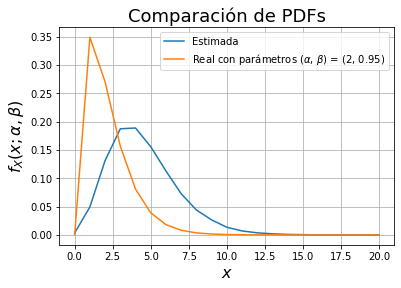

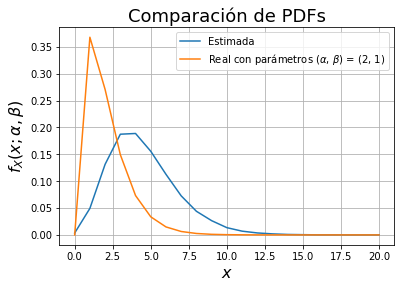

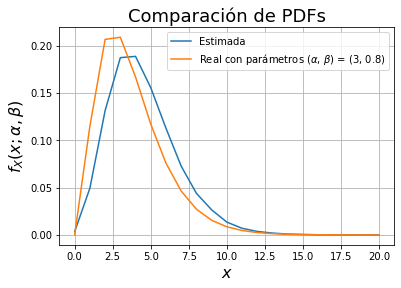

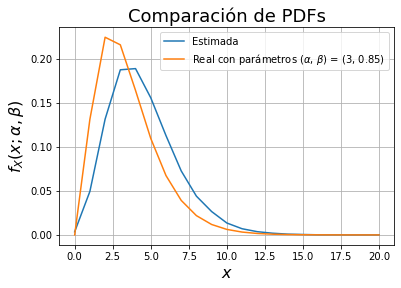

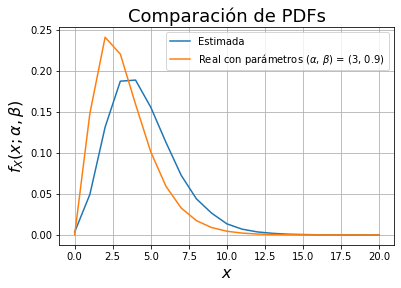

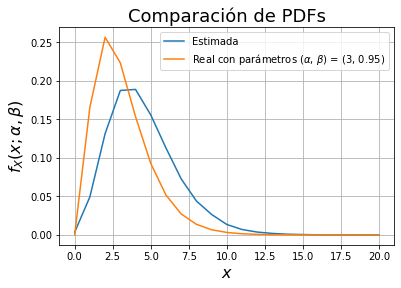

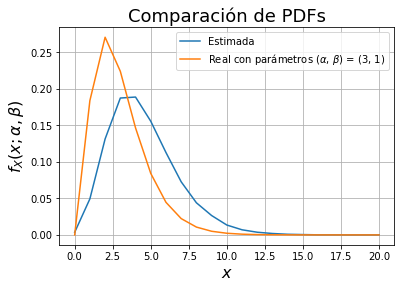

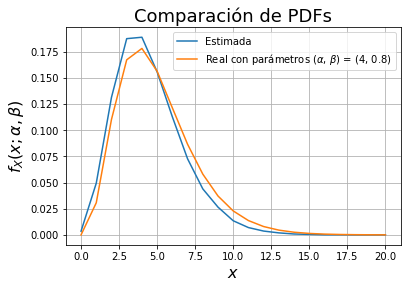

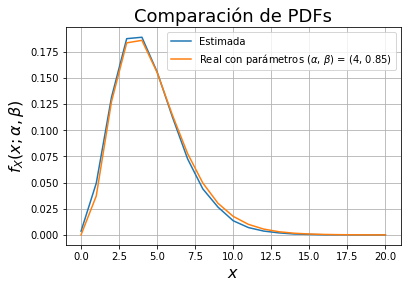

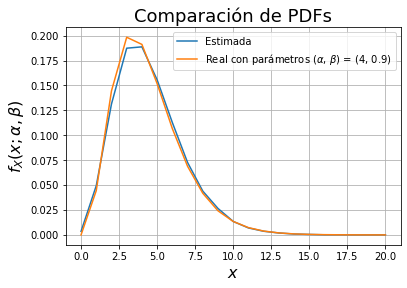

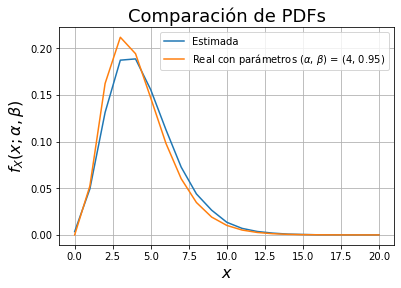

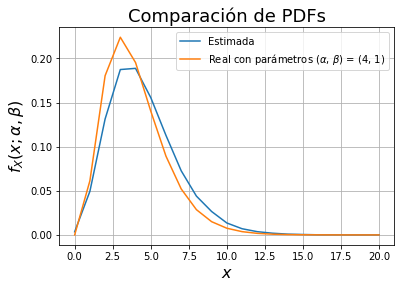

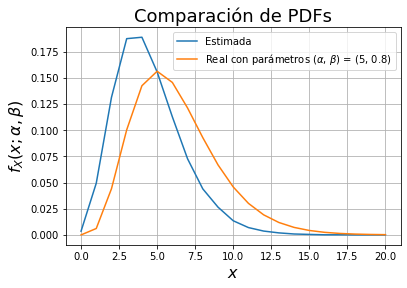

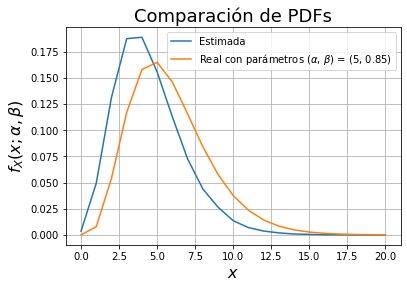

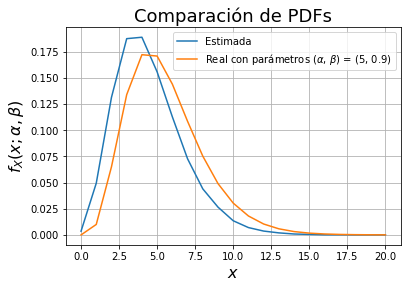

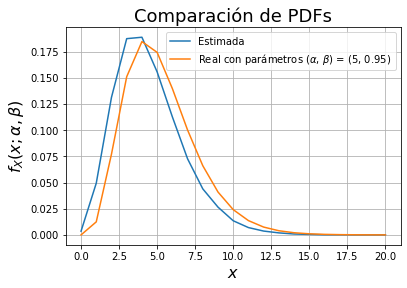

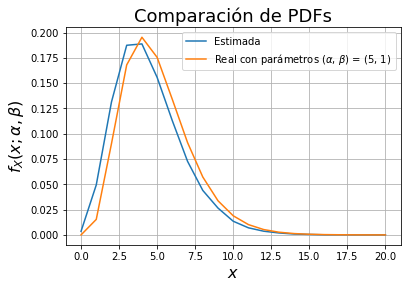

<Figure size 432x288 with 0 Axes>

In [ ]:
# Primero se genera un vector para el eje X de las PDFs.
ejex = np.linspace(0,20,len(frecuencia))

# Se define una función que evalúa la función de distribución de una variable
# aleatoria Gamma
def gamma_pdf(x, alpha, beta):
    g = ((beta**alpha)*(x**(alpha-1))*(np.exp(-beta*x)))/(gamma(alpha))
    return g

# Se crean listas para probar diferentes combinaciones de valores de alpha y beta
alphas = [1,2,3,4,5]
betas = [0.8,0.85,0.9,0.95,1]

# Se genera un vector donde se guardarán los valores de la distribución Gamma real
Gamma = np.zeros((len(frecuencia), 1))

# Se prueba cada beta y cada alpha dentro de la función real, para compararla con
# la estimación de la pdf que se hizo previamente.
for alpha in alphas:
    for beta in betas:
        for i in range(len(ejex)):
            Gamma[i] = gamma_pdf(ejex[i], alpha, beta)
        plt.plot(ejex, pdf)
        plt.plot(ejex, Gamma)
        plt.grid()
        plt.title('Comparación de PDFs', fontsize=18)
        plt.legend(['Estimada', f'Real con parámetros ' + r'($\alpha$, $\beta$) = ' + f'({alpha}, {beta})'])
        plt.xlabel(r'$x$', fontsize=16)
        plt.ylabel(r'$f_X(x; \alpha, \beta)$', fontsize=16)
        plt.figure()

Basado en las gráficas anteriores, se puede afirmar que los parámetros que mejor se ajustan a la pdf estimada a partir del histograma en el punto **a)** son $\alpha = 4$, $\beta=0.85$.

En este caso, nuestro $\Delta = 1$, pues los intervalos decididos en el histograma tienen longitud 1. Por lo tanto, para estimar la PDF de los datos, se usó

$$f_Z(a) \approx \frac{P(a \leq z \leq b)}{\Delta}$$
con $\Delta = 1$ y $P(a \leq z \leq b) = \frac{f_{rel}}{N}$, donde $f_{rel}$ corresponde a la frecuencia relativa de cada intervalo de datos, información que se obtuvo a partir del histograma en el literal a) y $N$ es el número total de datos (observaciones de la variable aleatoria). 